# Multi Layer Perceptron für 2D data

In [2]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from sklearn import datasets
from IPython.display import clear_output

## Trainingsaufgabe definieren

Erstellen Sie einen Datensatz mit der Sklearn datenset Bibliothek

>Mit [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) können Sie zwei Daten-Cluster erzeugen

>wählen Sie eine geeignete cluster_std, um die Cluster mit einem Single Layer Perceptron linear trennen zu können

In [2]:
X, y = # TODO

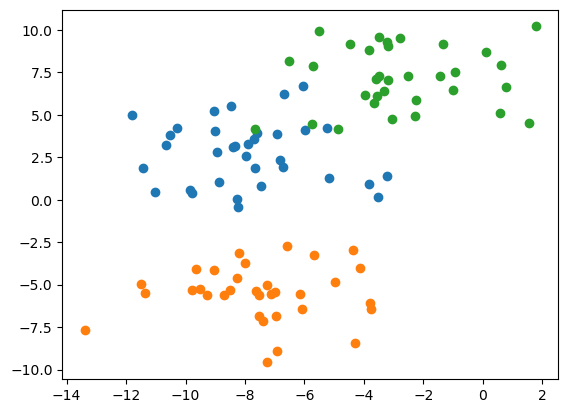

In [3]:
def scatter_plot():
    # TODO

## Was brauchen wir, um eine SLP zu modellieren?

- Instanzen (x_data) und Ziele (y_data) 
- 2 Gewichte (w)
- 1 Bias(b)
- Netzeingangsfunktion
- Aktivierungsfunktion
- Fehler- oder Lossfunktion

Erstellen Sie einen SLP-Klassifikator mit Hilfe der Pytorch-Bibliothek

* wenn Sie nicht die 'parameters()'-Funktion von Torch verwenden, stellen Sie sicher, dass Sie die automatische Differenzierung mit 'EXAMPLETENSOR.requires_grad = True' aktivieren

In [4]:
#Als Vorschlag:
class SLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(SLP, self).__init__()
        self.activation_function = # TODO

        # self.linear1 = ...
        # self.linear2 = ...
        

    def forward(self, x):        
        # TODO

In [16]:
torch.manual_seed(2)     #to generate reproducible outputs

input_size = # TODO
output_size = # TODO

model = SLP(input_size=input_size, output_size=input_size)

## Das Modell trainieren


Verwenden Sie die Pytorch-Bibliothek 
* wählen Sie eine geeignete Loss/Fehler-Funktion:  [PyTorch Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
* wählen Sie einen geeigneten Optimierer: [PyTorch Optimierer](https://pytorch.org/docs/stable/optim.html)

In [17]:
#Als Vorschlag
criterion = # TODO
optimizer = # TODO

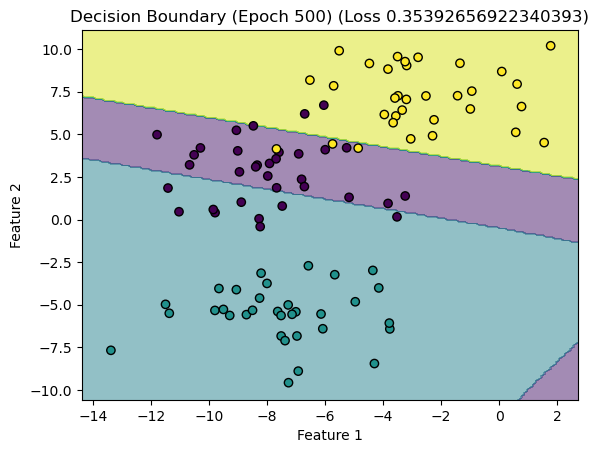

In [18]:
epochs = 500
losses = []

for i in range(epochs):
    X_full_batch = torch.tensor(X).float()
    y_full_bath = torch.tensor(y, dtype=torch.long)
    
    y_pred = model(X_full_batch)
    
    loss = criterion(y_pred, y_full_bath)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    #print("epoch:", i, "loss:", loss.item())

    if (i + 1)  % 10 == 0: 
    
        # Generate a grid of points in the feature space
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        
        # Reshape the grid points
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_points = torch.tensor(grid_points).float()
        
        # Calculate predicted class probabilities for the grid points
        with torch.no_grad():
            logits = model(grid_points)
            probs = torch.softmax(logits, dim=1)
            predictions = torch.argmax(probs, dim=1)
        
        # Plot the decision boundary
        plt.contourf(xx, yy, predictions.numpy().reshape(xx.shape), alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary (Epoch {}) (Loss {})'.format(i+1, loss.item()))
        plt.show()

        clear_output(wait=True)


## Lernkurve

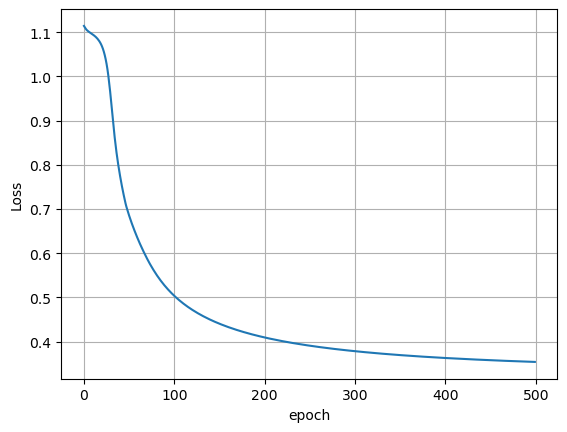

In [19]:
#Als Vorschlag
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

## Kreuzentropie

In [ ]:
#https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a